In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

In [2]:
dataframe = pd.read_csv('(Grad Desc)Power_Plnt_train.csv')

x = dataframe.drop(dataframe.columns[[-1]], axis = 1, inplace = False)
X = x.to_numpy()

EP = dataframe.drop(dataframe.iloc[:, 0:4], inplace = False, axis = 1)
Y = EP.to_numpy()
Y = np.reshape(Y, -1)

In [ ]:
print(x)
print(EP)

In [3]:
print(X)
print(Y)

[[   8.58   38.38 1021.03   84.37]
 [  21.79   58.2  1017.21   66.74]
 [  16.64   48.92 1011.55   78.76]
 ...
 [  29.8    69.34 1009.36   64.74]
 [  16.37   54.3  1017.94   63.63]
 [  30.11   62.04 1010.69   47.96]]
[482.26 446.94 452.56 ... 437.65 459.97 444.42]


In [4]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5382, 4)
(1794, 4)
(5382,)
(1794,)


## Using sklearn inbuilt GradientBoostingRegression

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
grad_alg2 = GradientBoostingRegressor()

In [7]:
grad_alg2.fit(x_train, y_train)

GradientBoostingRegressor()

In [8]:
y_pred_CCPP = grad_alg2.predict(x_test)
print(y_pred_CCPP)

[456.40292334 433.66314438 456.51752012 ... 434.28297705 434.19909636
 472.29181543]


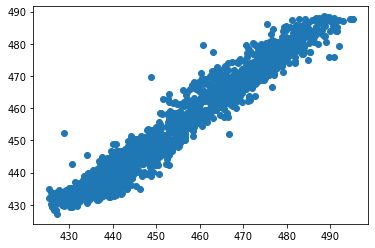

In [9]:
plt.scatter(y_test, y_pred_CCPP)
plt.show()

### Reading Test File and Writing Prediction

In [10]:
dataf_test = np.loadtxt('(Grad Desc)Power_Plnt_test.csv', delimiter = ',')
print(len(dataf_test))

2392


In [11]:
ans_y_Pred = grad_alg2.predict(dataf_test)
print(ans_y_Pred)

[470.11646429 472.88537525 435.39325188 ... 437.47109134 452.10561693
 445.7846477 ]


In [12]:
np.savetxt("CCPP_result.csv",ans_y_Pred,delimiter=",",fmt='%f')